# Demo Showing Building Neural Networks from Scratch

- This is a demo to show the functionality of the neural network modules that I have build from scratch.
- The source code exists inside the models folder.

In [10]:
# Importing the necessary modules needed for the demo.
from models import neural_network as nn
from models import model as md
import utils as ut
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Defining some global variables
samples = 1000
seed = 42
batch_size = 32
epochs = 30000
learning_rate = 0.01

Here we will be using the utils file that contains a class that generates points that forms the shape of a sine wave.

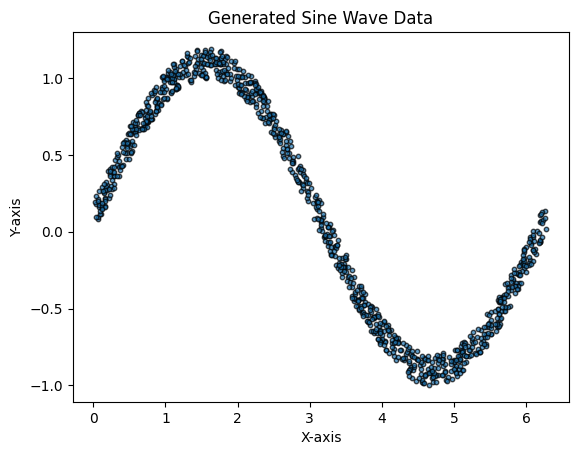

In [12]:
# Create DataSet
sin_wave = ut.SinData(samples, seed, batch_size)
x_values, y_values = sin_wave.x_values.reshape(-1, 1), sin_wave.y_values.reshape(-1, 1)
colors = np.random.rand(1000)

# Plot the points expressing sine wave data.
plt.title('Generated Sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(sin_wave.x_values,
            sin_wave.y_values,
            s=10,
            alpha=0.7,
            edgecolors='k')
plt.show()

The model class interfaces with the neural network module that has basic neural network functionalities.

In [13]:
# Defining model parametres
learning_rate = 0.01
epochs = 30000

# Create the model
model = md.Model()

# Add layers to the model
model.add(nn.DenseLayer(1, 16))
model.add(nn.ActivationReLU())
model.add(nn.DenseLayer(16, 1))
model.add(nn.ActivationLinear())

# Compile the model
# Defining the loss function and the optimizer that will be used in the learning process.
model.compile(loss=nn.LossMeanSquareError(), optimizer=nn.Optimizer_SGD(learning_rate=learning_rate))

In [14]:
# Train the model using the fit function.
model.fit(x_values, y_values, epochs=epochs) 

Epoch: 0, Loss: 0.4747366841293996
Epoch: 10000, Loss: 0.08915157758258528
Epoch: 20000, Loss: 0.0353846746635261
Neural Network Training has been complete


In [15]:
# Get basic information about the model architecture and parameters.
model.info()

Model Information:
Number of layers: 4

Layer 1:
  Type: DenseLayer
  Number of neurons: 16
  Weights shape: (1, 16)
  Biases shape: (1, 16)
  Weights: [[ 0.19071685  0.76820356 -0.08135437 -0.19355847 -0.06642243  0.40716946
  -0.04285    -0.08204681 -0.47219792  0.09448582 -0.13883902 -0.02172837
  -0.04972676 -0.06409044 -0.10170367  1.2858194 ]]
  Biases: [[-0.39462423 -1.2607684   0.          0.          0.         -0.39176437
   0.          0.          2.0221536  -0.09091192  0.          0.
   0.          0.          0.         -0.18935679]]

Layer 2:
ActivationReLU

Layer 3:
  Type: DenseLayer
  Number of neurons: 1
  Weights shape: (16, 1)
  Biases shape: (1, 1)
  Weights: [[-0.44047335]
 [-1.4769329 ]
 [ 0.02642978]
 [ 0.07251995]
 [-0.07960161]
 [-0.56089824]
 [-0.06490537]
 [-0.03466534]
 [ 2.0794742 ]
 [-0.12959386]
 [ 0.08395936]
 [-0.09688317]
 [-0.03836904]
 [ 0.09540138]
 [-0.08056054]
 [ 1.3002105 ]]
  Biases: [[-3.7308044]]

Layer 4:
ActivationLinear


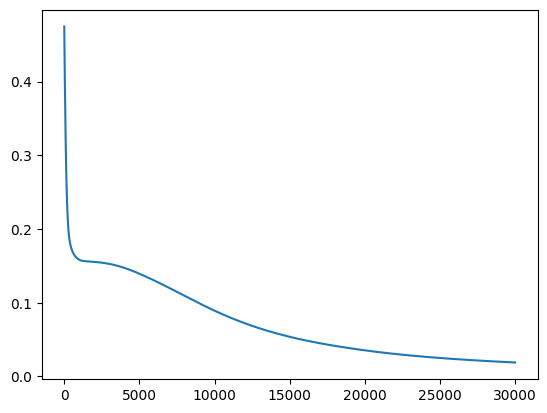

In [16]:
# Plot the history of the evolution of the loss values by each iteration
plt.plot(model.loss_history)

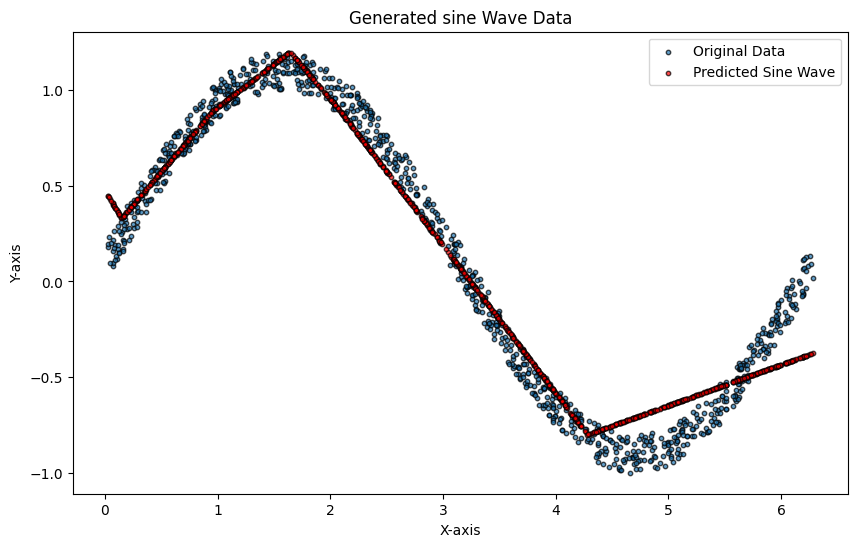

In [17]:
# Get predictions of the model.
predictions = model.predict(x_values)

# Create the plot of the predicted values.
plt.figure(figsize=(10, 6))
plt.title('Generated sine Wave Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Scatter plot of original data
plt.scatter(
    x_values,
    y_values,
    s=10,
    alpha=0.7,
    edgecolors='k',
    label='Original Data'
    )

plt.scatter(
    x_values,
    predictions,
    s=10,
    color='r',
    alpha=0.7,
    edgecolors='k',
    label='Predicted Sine Wave'
)

plt.legend()
plt.show()

Now you can save the model's parametres and using it in embedded devices by generating a generic .c file that contains weights, biases and layers of the model.

In [18]:
ut.ModelConverter.generate_c_code(model, 'model_weights.c')